# Training a Neural Network by Backpropagation

In this document, I build and train a neural network on a number of synthetic datasets, visualising the decision boundary of the network at regular intervals during training. The goal of this exercise is to demonstrate that neural networks can learn highly non-linear decision boundaries.

Firstly, packages relevant to the datasets and plotting are imported:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from sklearn import datasets

Next, a dataset containing points on the plane arranged in two opposing crescent shapes, called moons, is created:

In [2]:
X_moons, y_moons = datasets.make_moons(1000, noise = 0.15)

# Rescale points to be centered about (0,0)
X_moons = X_moons - np.amin(X_moons, axis = 0)
X_moons = X_moons/np.amax(X_moons, axis = 0)*1.5 - 0.75
y_moons = y_moons.reshape(-1, 1)

We next visualise the dataset using matplotlib:

In [3]:
plt.set_cmap('jet')

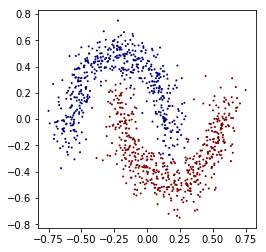

In [4]:
plt.scatter(X_moons[:,0],X_moons[:,1], c=y_moons.ravel(), s = 1)
plt.axis('square');

A dataset containing points in two classes is created: one approximately within a disc surrounding the origin and one approximately outside the disc. The class of the point is decided using a distribution which is a function of the distance of the point from the origin.

In [5]:
beta = 8
sigma = 0.7
X_disc = np.random.rand(1000, 2)*2-1
y_disc = np.exp(-(np.linalg.norm(X_disc, axis = 1)/sigma)**beta).reshape(-1,1) > np.random.rand(1000,1)

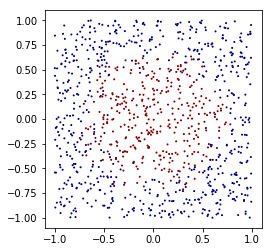

In [6]:
plt.scatter(X_disc[:,0], X_disc[:,1], c=y_disc.ravel(), s = 1)
plt.axis('square');

The sigmoid function is introduced to act as the activation function for the neurons in the network:

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

The derivative of the sigmoid function is used in the backpropagation step of training the neural network:

In [8]:
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

Two functions serve to store and extract parameters from a dictionary for ease of passing into a function.

In [9]:
def pack_parameters(W1, b1, W2, b2):
    return {"W1": W1, "W2": W2, "b1": b1, "b2": b2}

def unpack_parameters(parameters):
    return [parameters["W1"], parameters["b1"],parameters["W2"],parameters["b2"]]

def unpack_cache(cache):
    return [cache["Z1"],cache["A1"],cache["Z2"],cache["A2"]]

The forward propagation function takes in a set of points and a two-layer neural network and returns the network's predictions and a cache of the activations of the network after propagation.

In [10]:
def forward_propagate(X, parameters, threshold = 0.5):
    W1, b1, W2, b2 = unpack_parameters(parameters)
    Z1 = np.dot(X, W1) + b1.T
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return (A2 > threshold), cache

The cost function J is minimized through training the neural network by backpropagation

In [11]:
def J(pred, y):
    m = len(pred)
    return 1/(2*m)*np.sum(np.power((y - pred),2))

The neural network parameters are initialised as follows: the weights to small

In [12]:
def initialise_parameters(hidden, epsilon = 0.01):
    W1 = np.random.randn(2, hidden) * epsilon
    W2 = np.random.randn(hidden, 1) * epsilon
    b1 = np.zeros((hidden, 1))
    b2 = 0
    
    return([W1, b1, W2, b2])

A grid is created over the the range of the datapoints, so that a decision boundary can be displayed while the neural network is learning. The grid is passed through the network and the resulting response visualised.

In [13]:
xgrid, ygrid = np.meshgrid(np.linspace(-1, 1, 100),np.linspace(-1, 1, 100))
Xgrid = np.vstack([xgrid.ravel(), ygrid.ravel()]).T

In [14]:
def plot_decision_boundary(X, y, parameters, cost):
    
    pred_grid, _ = forward_propagate(Xgrid, parameters)
    display.clear_output(True)

    plt.contour(xgrid ,ygrid, pred_grid.reshape(xgrid.shape))
    plt.axis('equal')
    plt.hold(True)
    plt.scatter(X[:,0],X[:,1], c=y.ravel(), s = 1)
    plt.hold(False)
    plt.title("Cost function J = {:.6f}".format(cost))
    plt.show()

This function trains the neural network while intermittently calling the plot_decision_boundary function to visualise the progress of the model.

In [15]:
def train(X, y, hidden = 3, epochs = 20000, alpha = 10, epsilon = 0.1):

    W1, b1, W2, b2 = initialise_parameters(hidden, epsilon)
    m = X.shape[0]
    
    for i in range(epochs):
        parameters = pack_parameters(W1, b1, W2, b2)
        pred_moons, cache = forward_propagate(X, parameters)

        Z1, A1, Z2, A2 = unpack_cache(cache)
        
        # Plot the decision boundary once every n epochs
        if np.mod(i, 250) == 0:
            Jval = J(A2, y)
            plot_decision_boundary(X, y, parameters, Jval)
        
        # Calculate the derivative of the cost function with respect to the parameters
        dy  = (A2 - y)
        db2 = sigmoid_derivative(Z2) * dy
        dW2 = A1 * db2
        db1 = sigmoid_derivative(Z1) * dW2 * W2.T
        dW1 = np.dot(X.T,  db1)
        
        # Update the parameters according to the calculated derivatives and the learning rate
        b2 = b2 - alpha * 1/m*np.sum(db2, axis = 0, keepdims = True)
        W2 = W2 - alpha * 1/m*np.sum(dW2, axis = 0, keepdims = True).T
        b1 = b1 - alpha * 1/m*np.sum(db1, axis = 0, keepdims = True).T
        W1 = W1 - alpha * 1/m*dW1

We attempt to train the model on the 'moons' dataset:

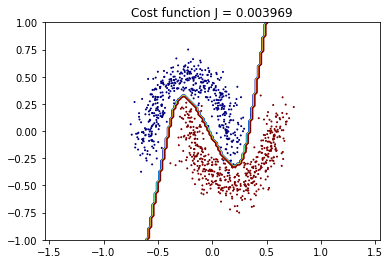

In [16]:
train(X_moons, y_moons)

and the 'disc' dataset:

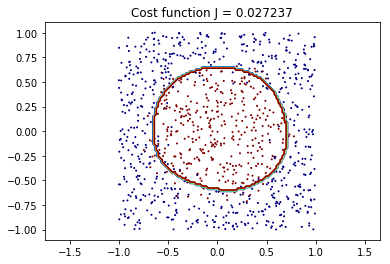

In [17]:
train(X_disc, y_disc)

## Conclusion

Neural networks can effectively learn non-linear decision boundaries, and can be implemented in Python using relatively few lines of code.